In [5]:

import numpy as np
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression
import pandas as pd

data = pd.read_csv('our_tfidf_1000.csv')

In [19]:
X = data.loc[:, data.columns != 'y'].to_numpy()

In [20]:
y = data['y'].tolist()


In [37]:
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression(multi_class="auto", solver="liblinear")
model = DecisionTreeClassifier()
viz = FeatureImportances(model, stack=True, labels=data.columns, relative=False, topn=25)
viz.fit(X, y)
viz.show()

IndexError: too many indices for array

In [24]:
data.columns[464]

'json'

In [26]:

model.coef_

array([[ 0.01155739, -0.12525829, -0.06624219, ..., -0.02164493,
        -0.0567488 , -0.00540884],
       [ 0.00088139, -0.03042006, -0.07013756, ..., -0.00797225,
        -0.05054076, -0.03716119],
       [-0.01072723, -0.02117535, -0.08932219, ..., -0.02409501,
         0.12104051, -0.05684984],
       ...,
       [-0.0273605 , -0.06134533, -0.11518599, ..., -0.00677017,
        -0.07622236, -0.10917985],
       [ 0.00687267, -0.01663181, -0.05054292, ..., -0.00402315,
        -0.04181492, -0.0064869 ],
       [-0.01079097, -0.0352728 , -0.12199531, ..., -0.01464621,
        -0.07736553, -0.02797795]])

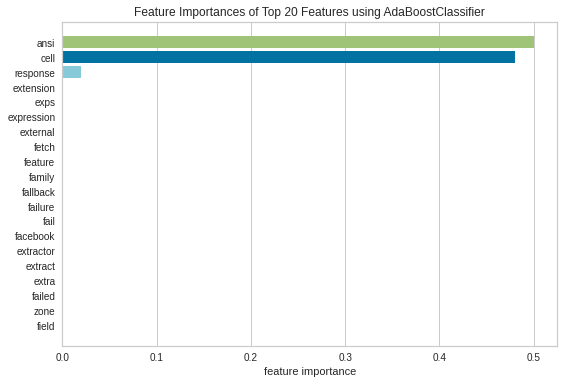

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f52ab65c730>,
                   estimator=AdaBoostClassifier(),
                   labels=Index(['absolute', 'accept', 'access', 'accessor', 'accessors', 'account',
       'ack', 'action', 'active', 'actor',
       ...
       'wrapper', 'write', 'writer', 'xlink', 'xml', 'year', 'yield', 'zero',
       'zone', 'y'],
      dtype='object', length=1001),
                   relative=False, topn=20)

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.model_selection import feature_importances

feature_importances(AdaBoostClassifier(), X, y, topn=20, relative=False, labels=data.columns)

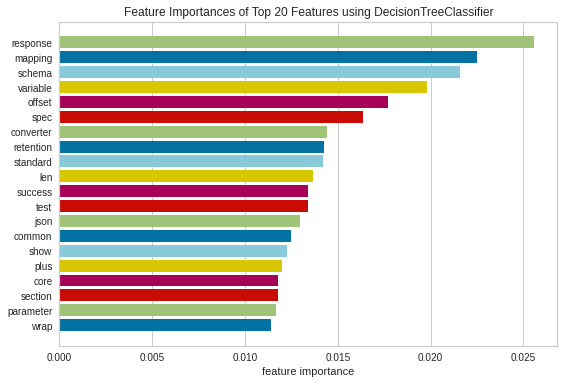

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f52ac557be0>,
                   estimator=DecisionTreeClassifier(),
                   labels=Index(['absolute', 'accept', 'access', 'accessor', 'accessors', 'account',
       'ack', 'action', 'active', 'actor',
       ...
       'wrapper', 'write', 'writer', 'xlink', 'xml', 'year', 'yield', 'zero',
       'zone', 'y'],
      dtype='object', length=1001),
                   relative=False, topn=20)

In [40]:
from sklearn.tree import DecisionTreeClassifier
feature_importances(DecisionTreeClassifier(), X,y=y, topn=20, relative=False, labels=data.columns)

Feature ranking:
1. feature mapping (0.004555)
2. feature json (0.003994)
3. feature request (0.003786)
4. feature common (0.003404)
5. feature offset (0.002822)
6. feature apache (0.002818)
7. feature client (0.002775)
8. feature actual (0.002773)
9. feature sql (0.002739)
10. feature day (0.002644)
11. feature query (0.002625)
12. feature response (0.002483)
13. feature parser (0.002451)
14. feature expected (0.002433)
15. feature header (0.002381)
16. feature http (0.002275)
17. feature algorithm (0.002268)
18. feature parent (0.002261)
19. feature calendar (0.002256)
20. feature core (0.002233)
21. feature host (0.002222)
22. feature date (0.002219)
23. feature connection (0.002213)
24. feature number (0.002198)
25. feature option (0.002186)
26. feature failure (0.002140)
27. feature pattern (0.002135)
28. feature assignable (0.002134)
29. feature data (0.002133)
30. feature image (0.002131)
31. feature join (0.002106)
32. feature timeout (0.002100)
33. feature year (0.002087)
34. 

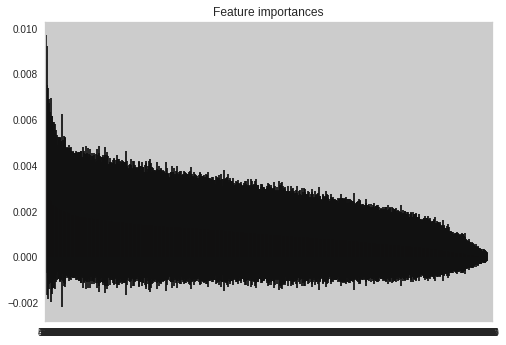

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, data.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [50]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 0.29


AttributeError: 'DataFrame' object has no attribute 'feature_names'

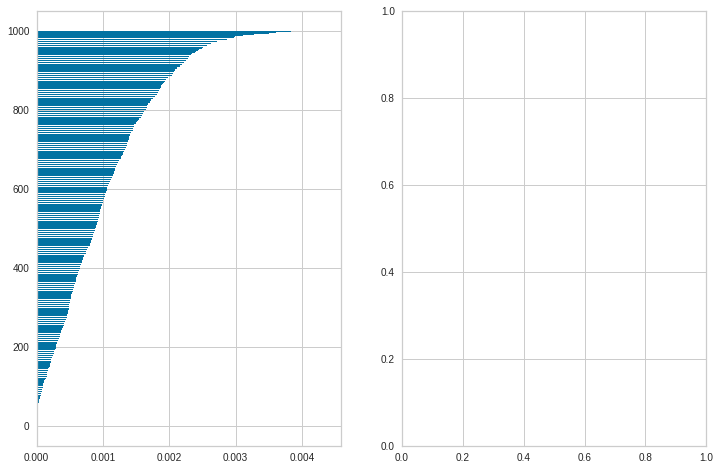

In [51]:

result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

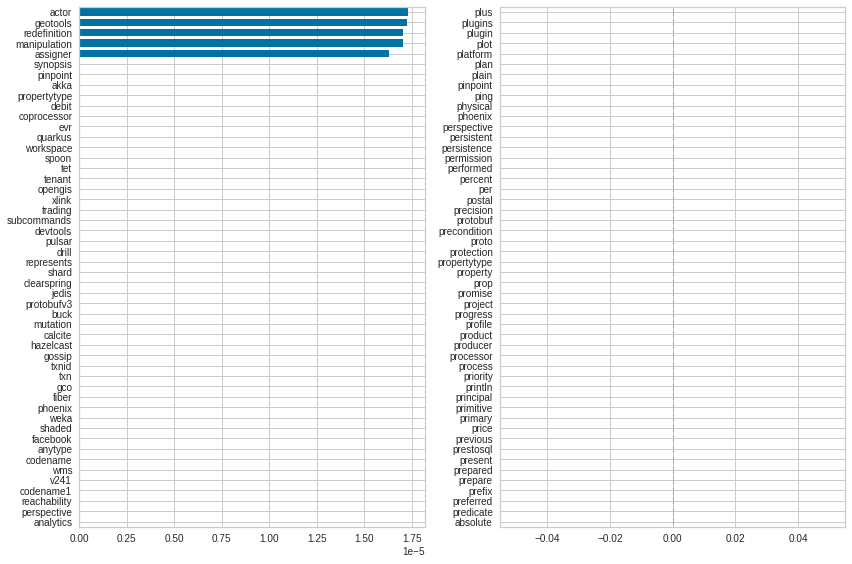

In [61]:
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)[:50]
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5
tree_indices = tree_indices[:50]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx][:50], height=0.7)
ax1.set_yticklabels(data.columns[tree_importance_sorted_idx][:50])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, 50))
ax2.boxplot(result.importances[perm_sorted_idx][:50].T, vert=False,
            labels=data.columns[perm_sorted_idx][:50])
fig.tight_layout()
plt.show()